# EXP4
 Implement programs for estimating & eliminating trend in time series data- aggregation, smoothing.

In [ ]:
pip install yfinance statsmodels

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
df=yf.download("GOOGL",start='2010-01-01',end='2025-01-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
print(df.head)

<bound method NDFrame.head of Price            Close        High         Low        Open     Volume
Ticker           GOOGL       GOOGL       GOOGL       GOOGL      GOOGL
Date                                                                 
2010-01-04   15.609803   15.678544   15.547290   15.614784   78169752
2010-01-05   15.541063   15.636952   15.480044   15.620514  120067812
2010-01-06   15.149294   15.587638   15.101973   15.587638  158988852
2010-01-07   14.796624   15.192630   14.760511   15.177685  256315428
2010-01-08   14.993880   15.024514   14.672343   14.744322  188783028
...                ...         ...         ...         ...        ...
2024-12-24  195.884399  195.884399  193.557078  194.615856   10403300
2024-12-26  195.375000  196.523671  194.156402  194.925505   12046600
2024-12-27  192.538254  195.095322  190.430680  194.725737   18891400
2024-12-30  191.020004  192.328495  188.902433  189.581658   14264700
2024-12-31  189.082245  191.739189  188.293145  190.860196  

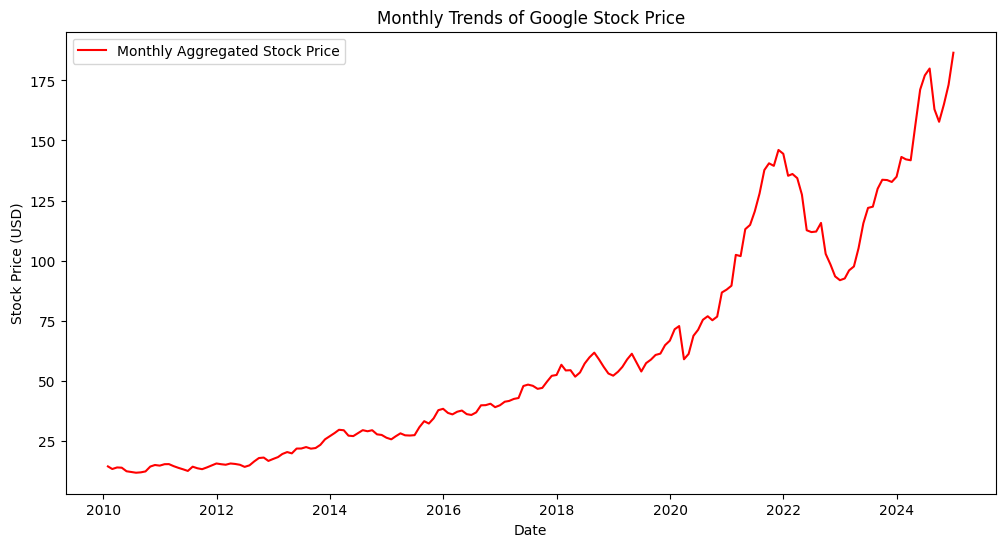

In [ ]:
monthly_data=df['Close'].resample('ME').mean()
plt.figure(figsize=(12,6))
plt.plot(monthly_data,label='Monthly Aggregated Stock Price',color='red')
plt.title('Monthly Trends of Google Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()


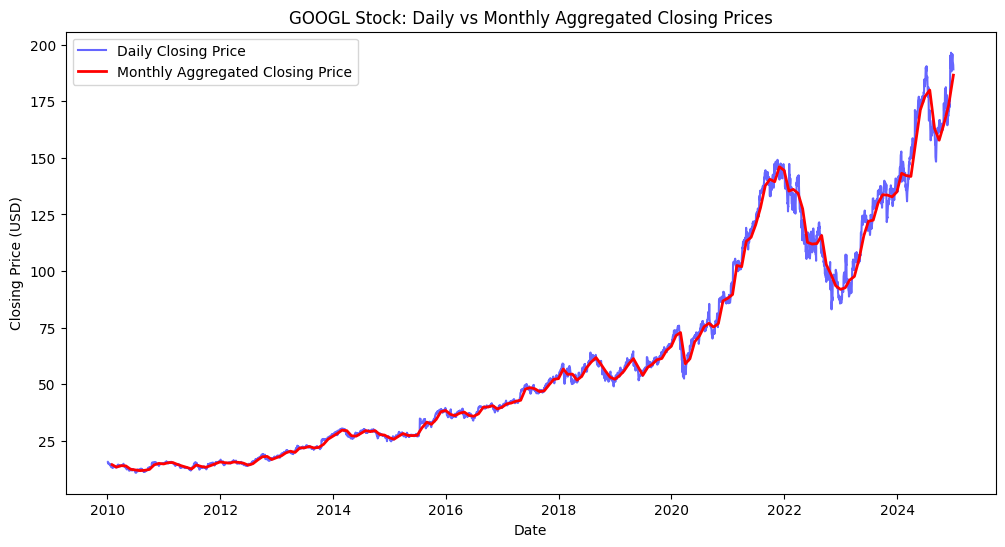

In [ ]:
plt.figure(figsize=(12, 6))
# Plot daily closing prices (before aggregation)
plt.plot(df['Close'], label='Daily Closing Price', alpha=0.6, color='blue')

# Plot monthly aggregated closing prices (after aggregation)
plt.plot(monthly_data, label='Monthly Aggregated Closing Price', color='red', linewidth=2)

plt.title('GOOGL Stock: Daily vs Monthly Aggregated Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()


# Smoothing using moving average


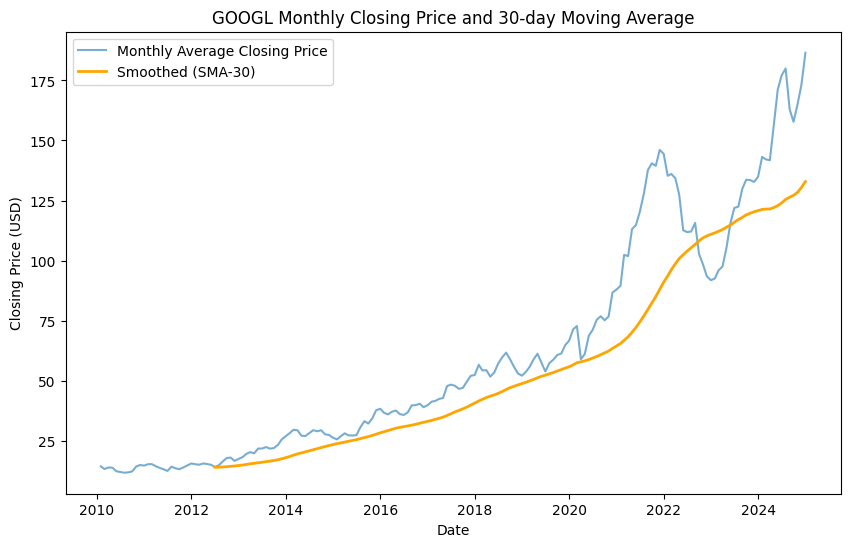

In [ ]:
# Applying a moving average with a window size of 30 days
window_size = 30
monthly_data_sma = monthly_data.rolling(window=window_size).mean()

# Plotting the original and smoothed data
plt.figure(figsize=(10, 6))
plt.plot(monthly_data, label='Monthly Average Closing Price', alpha=0.6)
plt.plot(monthly_data_sma, label=f'Smoothed (SMA-{window_size})', color='orange', linewidth=2)
plt.title(f'GOOGL Monthly Closing Price and {window_size}-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()


# Smoothing using exponential smoothing

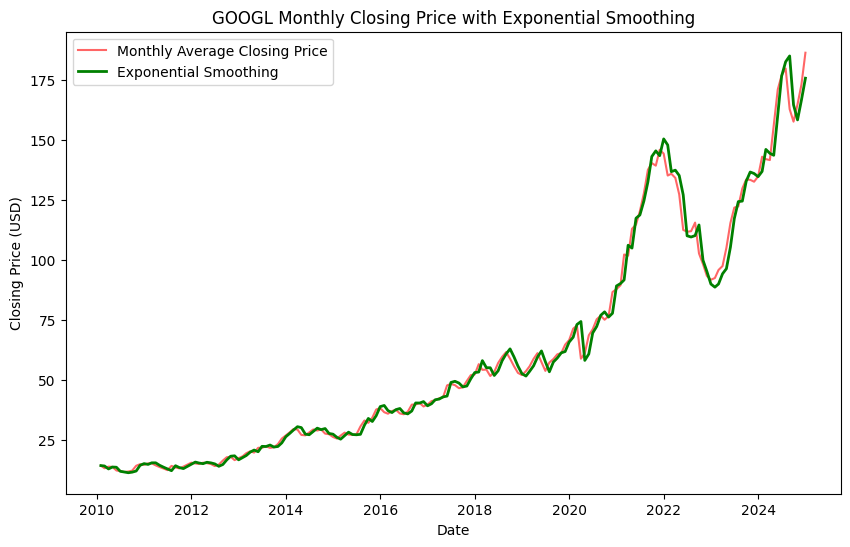

In [ ]:
model = ExponentialSmoothing(monthly_data, trend='add', seasonal=None, damped_trend=False)
fit_model = model.fit()

# Forecast smoothed values
monthly_data_smooth = fit_model.fittedvalues

# Plotting the original and smoothed data
plt.figure(figsize=(10, 6))
plt.plot(monthly_data, label='Monthly Average Closing Price',color='red', alpha=0.6)
plt.plot(monthly_data_smooth, label='Exponential Smoothing', color='green', linewidth=2)
plt.title('GOOGL Monthly Closing Price with Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()